In [15]:
### Source: http://baoilleach.blogspot.nl/2014/01/convert-distance-matrix-to-2d.html

# Approximate distances between politicians
%matplotlib inline
import csv
import numpy as np
matplotlib.use('TkAgg')
import matplotlib
import matplotlib.pyplot as plt
from sklearn import manifold

def MDS_from_csv(filename):
    """Performs Multi-dimensional Scaling on similarity data from csv"""
    reader = csv.reader(open(filename, "r"), delimiter=',')
    data = list(reader)

    cosines = []
    politicians = []
    for d in data[1:]:
        politicians.append(d[0])
        cosines.append(map(float , d[1:]))

    cosinearray = np.array(cosines)
    cosinearray = np.multiply(cosinearray, 1000)

    amax = np.amax(cosinearray)
    cosinearray /= amax

    mds = manifold.MDS(n_components=2, dissimilarity="euclidean", max_iter=50000, n_init=50)
    results = mds.fit(cosinearray)

    coords = results.embedding_

    plt.subplots_adjust(bottom = 0.1)
    
    if len(cosinearray) > 50:
        plt.figure(figsize=(20,20))
    plt.xticks([])
    plt.yticks([])
    plt.scatter(
        coords[:, 0], coords[:, 1], marker = 'o'
        )
    for label, x, y in zip(politicians, coords[:, 0], coords[:, 1]):
        plt.annotate(
            label,
            xy = (x, y), xytext = (-1, 1), rotation=0,
            textcoords = 'offset points', ha = 'right', va = 'bottom')

    plt.show()

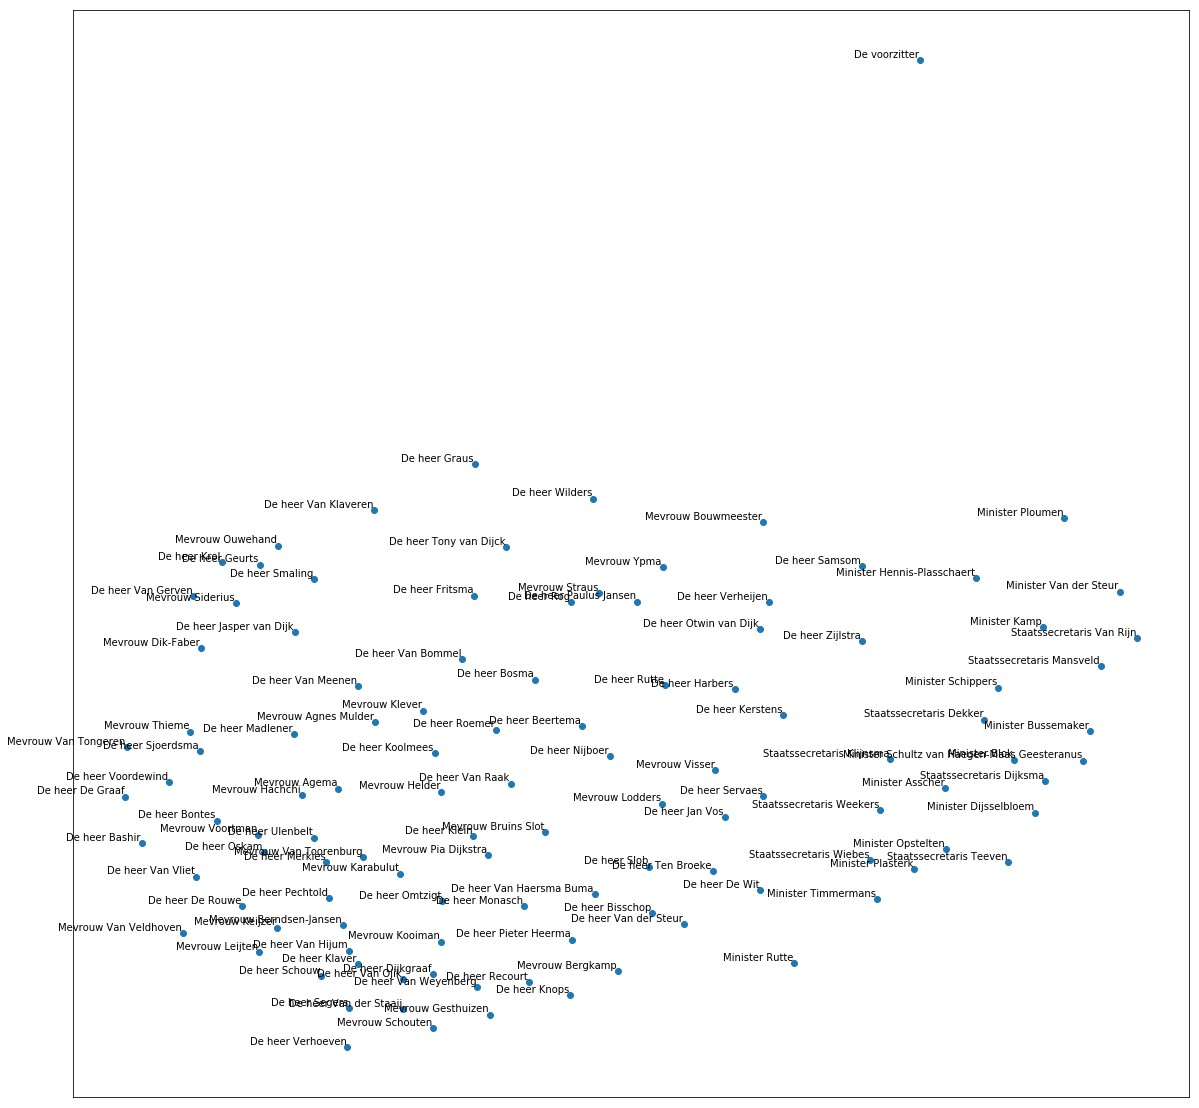

In [16]:
MDS_from_csv('similarity.csv')

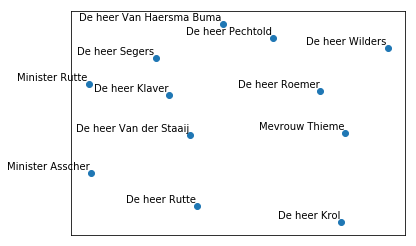

In [14]:
MDS_from_csv('lijsttrekkers.csv')

In [2]:
# Making dataframes where the similarity between same people are either zero or one 
# (used in showing highest/lowest cosine)

import pandas as pd

highestCosines = []
lowestCosines = []

def highest_cosine(row):
    highestCosines.append((row.name, row.idxmax(), row.max()))
    
def lowest_cosine(row):
    lowestCosines.append((row.name, row.idxmin(), row.min()))

oneFrame = pd.DataFrame.from_csv('similarity.csv')
zeroFrame = oneFrame.replace(1.00, 0)

zeroFrame.apply(highest_cosine)
oneFrame.apply(lowest_cosine)

De heer Bashir                                  None
De heer Beertema                                None
De heer Bisschop                                None
De heer Bontes                                  None
De heer Bosma                                   None
De heer De Graaf                                None
De heer De Rouwe                                None
De heer De Wit                                  None
De heer Dijkgraaf                               None
De heer Fritsma                                 None
De heer Geurts                                  None
De heer Graus                                   None
De heer Harbers                                 None
De heer Jan Vos                                 None
De heer Jasper van Dijk                         None
De heer Kerstens                                None
De heer Klaver                                  None
De heer Klein                                   None
De heer Knops                                 

In [3]:
# Show lowest cosine that is not with 'De voorzitter'
lowCosineFrame = pd.DataFrame(lowestCosines, columns=['politicus_1', 'politicus_2', 'cosinus'])
lowCosineFrame.query("politicus_2 != 'De voorzitter' and politicus_1 != 'De voorzitter'")

politicus_1       politicus_2  cosinus
28  De heer Paulus Jansen  Minister Ploumen      0.3

In [4]:
# Show lowest cosines including 'De voorzitter'
lowest = lowCosineFrame.cosinus.min()
lowCosineFrame.query("cosinus == @lowest")

politicus_1     politicus_2  cosinus
35             De heer Samsom   De voorzitter     0.18
61           De heer Zijlstra   De voorzitter     0.18
62              De voorzitter  De heer Samsom     0.18
103       Minister Timmermans   De voorzitter     0.18
111  Staatssecretaris Weekers   De voorzitter     0.18

In [5]:
# Show highest cosine
highCosineFrame = pd.DataFrame(highestCosines, columns=['politicus_1', 'politicus_2', 'cosinus'])
highest = highCosineFrame.cosinus.max()
highCosineFrame.query("cosinus == @highest")

politicus_1            politicus_2  cosinus
54  De heer Van Weyenberg       Mevrouw Schouten     0.82
81       Mevrouw Schouten  De heer Van Weyenberg     0.82

In [6]:
# Dataframe with only 'lijsttrekkers' from recent election

politicians = ['Minister Rutte', 'De heer Rutte', 'Minister Asscher', 'De heer Wilders', 'De heer Roemer',
              'De heer Van Haersma Buma', 'De heer Pechtold', 'De heer Segers', 'De heer Klaver', 'De heer Van der Staaij',
              'Mevrouw Thieme', 'De heer Krol']
lijsttrekkers = oneFrame[politicians].loc[politicians]
lijsttrekkers

Minister Rutte  De heer Rutte  Minister Asscher  \
0                                                                           
Minister Rutte                      1.00           0.56              0.60   
De heer Rutte                       0.56           1.00              0.54   
Minister Asscher                    0.60           0.54              1.00   
De heer Wilders                     0.48           0.48              0.42   
De heer Roemer                      0.56           0.54              0.54   
De heer Van Haersma Buma            0.64           0.50              0.58   
De heer Pechtold                    0.58           0.50              0.54   
De heer Segers                      0.68           0.54              0.54   
De heer Klaver                      0.68           0.62              0.56   
De heer Van der Staaij              0.60           0.64              0.58   
Mevrouw Thieme                      0.54           0.54              0.50   
De heer Krol                        0.44           0.46              0.46   

                          De heer Wilders  De heer Roemer  \
0                                                           
Minister Rutte                       0.48            0.56   
De heer Rutte                        0.48            0.54   
Minister Asscher                     0.42            0.54   
De heer Wilders                      1.00            0.66   
De heer Roemer                       0.66            1.00   
De heer Van Haersma Buma             0.62            0.62   
De heer Pechtold                     0.66            0.68   
De heer Segers                       0.52            0.58   
De heer Klaver                       0.54            0.60   
De heer Van der Staaij               0.50            0.60   
Mevrouw Thieme                       0.58            0.66   
De heer Krol                         0.40            0.48   

                          De heer Van Haersma Buma  De heer Pechtold  \
0                                                                      
Minister Rutte                                0.64              0.58   
De heer Rutte                                 0.50              0.50   
Minister Asscher                              0.58              0.54   
De heer Wilders                               0.62              0.66   
De heer Roemer                                0.62              0.68   
De heer Van Haersma Buma                      1.00              0.76   
De heer Pechtold                              0.76              1.00   
De heer Segers                                0.66              0.66   
De heer Klaver                                0.66              0.68   
De heer Van der Staaij                        0.62              0.64   
Mevrouw Thieme                                0.62              0.66   
De heer Krol                                  0.44              0.48   

                          De heer Segers  De heer Klaver  \
0                                                          
Minister Rutte                      0.68            0.68   
De heer Rutte                       0.54            0.62   
Minister Asscher                    0.54            0.56   
De heer Wilders                     0.52            0.54   
De heer Roemer                      0.58            0.60   
De heer Van Haersma Buma            0.66            0.66   
De heer Pechtold                    0.66            0.68   
De heer Segers                      1.00            0.72   
De heer Klaver                      0.72            1.00   
De heer Van der Staaij              0.72            0.74   
Mevrouw Thieme                      0.60            0.60   
De heer Krol                        0.54            0.52   

                          De heer Van der Staaij  Mevrouw Thieme  De heer Krol  
0                                                                               
Minister Rutte                              0.60            0.54          0.44  

In [9]:
lijsttrekkers[['De heer Rutte', 'Minister Rutte']]

De heer Rutte  Minister Rutte
0                                                      
Minister Rutte                     0.56            1.00
De heer Rutte                      1.00            0.56
Minister Asscher                   0.54            0.60
De heer Wilders                    0.48            0.48
De heer Roemer                     0.54            0.56
De heer Van Haersma Buma           0.50            0.64
De heer Pechtold                   0.50            0.58
De heer Segers                     0.54            0.68
De heer Klaver                     0.62            0.68
De heer Van der Staaij             0.64            0.60
Mevrouw Thieme                     0.54            0.54
De heer Krol                       0.46            0.44

In [10]:
lijsttrekkers['De heer Wilders']

0
Minister Rutte              0.48
De heer Rutte               0.48
Minister Asscher            0.42
De heer Wilders             1.00
De heer Roemer              0.66
De heer Van Haersma Buma    0.62
De heer Pechtold            0.66
De heer Segers              0.52
De heer Klaver              0.54
De heer Van der Staaij      0.50
Mevrouw Thieme              0.58
De heer Krol                0.40
Name: De heer Wilders, dtype: float64

In [11]:
lijsttrekkers['De heer Klaver']

0
Minister Rutte              0.68
De heer Rutte               0.62
Minister Asscher            0.56
De heer Wilders             0.54
De heer Roemer              0.60
De heer Van Haersma Buma    0.66
De heer Pechtold            0.68
De heer Segers              0.72
De heer Klaver              1.00
De heer Van der Staaij      0.74
Mevrouw Thieme              0.60
De heer Krol                0.52
Name: De heer Klaver, dtype: float64

In [7]:
# Write small dataframe to csv
lijsttrekkers.to_csv('lijsttrekkers.csv')